Taxi-v3 problem using Q-Learning, Deep Q-Learning, Sarse and Policy Gradient

Q-learning:

Episode 0, Total Reward: -1
Episode 0, Total Reward: -11
Episode 0, Total Reward: -12
Episode 0, Total Reward: -13
Episode 0, Total Reward: -14
Episode 0, Total Reward: -24
Episode 0, Total Reward: -25
Episode 0, Total Reward: -35
Episode 0, Total Reward: -36
Episode 0, Total Reward: -37
Episode 0, Total Reward: -38
Episode 0, Total Reward: -48
Episode 0, Total Reward: -58
Episode 0, Total Reward: -68
Episode 0, Total Reward: -78
Episode 0, Total Reward: -88
Episode 0, Total Reward: -89
Episode 0, Total Reward: -90
Episode 0, Total Reward: -100
Episode 0, Total Reward: -101
Episode 0, Total Reward: -102
Episode 0, Total Reward: -103
Episode 0, Total Reward: -104
Episode 0, Total Reward: -114
Episode 0, Total Reward: -115
Episode 0, Total Reward: -125
Episode 0, Total Reward: -126
Episode 0, Total Reward: -127
Episode 0, Total Reward: -137
Episode 0, Total Reward: -138
Episode 0, Total Reward: -139
Episode 0, Total Reward: -140
Episode 0, Total Reward: -141
Episode 0, Total Reward: -142

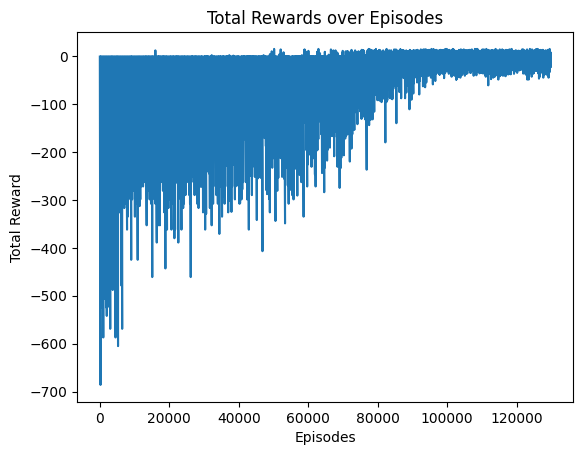

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Hyperparameters
alpha = 0.1 # Learning rate
gamma = 0.99 # Discount factor
epsilon = 1 # Exploration

# Q-table init
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))
rewards = []

# Training loop
episodes = 4000

for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run
    done = False
    total_reward = 0

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # Take a random action aka explore
        else:
            action = np.argmax(q_table[observation]) # Take the best action aka exploit

        next_observation, reward, terminated, truncated, info = env.step(action)

        # Updating the Q-table (state is observation)
        best_next_action = np.max(q_table[next_observation])
        q_table[observation, action] = q_table[observation, action] + \
            alpha * (reward + gamma * best_next_action - q_table[observation, action])
        
        # Update observation
        observation = next_observation

        total_reward += reward
        rewards.append(total_reward)

        epsilon = max(0.1, epsilon * 0.995)

        if episode % 1000 == 0:
            print(f'Episode {episode}, Total Reward: {total_reward}')

        done = terminated or truncated

plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()


env.close()

Deep Q-learning

Sarsa

Episode 0, Total Reward: -1
Episode 0, Total Reward: -11
Episode 0, Total Reward: -12
Episode 0, Total Reward: -13
Episode 0, Total Reward: -14
Episode 0, Total Reward: -24
Episode 0, Total Reward: -25
Episode 0, Total Reward: -35
Episode 0, Total Reward: -36
Episode 0, Total Reward: -37
Episode 0, Total Reward: -38
Episode 0, Total Reward: -48
Episode 0, Total Reward: -58
Episode 0, Total Reward: -68
Episode 0, Total Reward: -78
Episode 0, Total Reward: -88
Episode 0, Total Reward: -89
Episode 0, Total Reward: -90
Episode 0, Total Reward: -100
Episode 0, Total Reward: -101
Episode 0, Total Reward: -102
Episode 0, Total Reward: -103
Episode 0, Total Reward: -104
Episode 0, Total Reward: -105
Episode 0, Total Reward: -115
Episode 0, Total Reward: -125
Episode 0, Total Reward: -126
Episode 0, Total Reward: -127
Episode 0, Total Reward: -137
Episode 0, Total Reward: -138
Episode 0, Total Reward: -139
Episode 0, Total Reward: -140
Episode 0, Total Reward: -141
Episode 0, Total Reward: -142

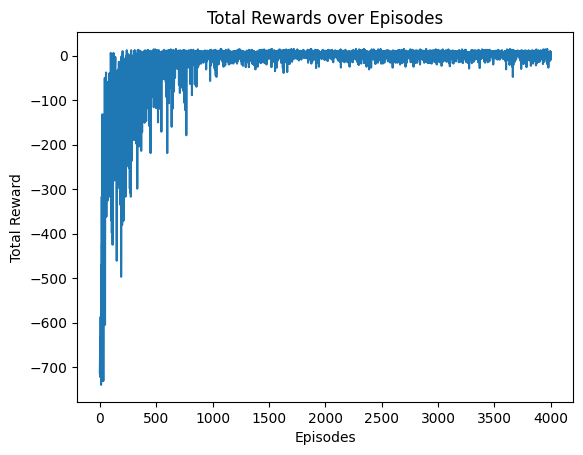

: 

In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Hyperparameters
alpha = 0.2 # Learning rate
gamma = 0.99 # Discount factor
epsilon = 1 # Exploration

# Q-table init
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))
rewards = []

# Training loop
episodes = 4000

for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run
    done = False
    total_reward = 0

    # Initial action
    action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[observation])

    while not done:

        next_observation, reward, terminated, truncated, info = env.step(action)

        next_action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[next_observation])

        

        # Updating the Q-table (state is observation)
        q_table[observation, action] = q_table[observation, action] + \
            alpha * (reward + gamma * q_table[next_observation, next_action] - q_table[observation, action])
        
        # Update observation
        observation, action = next_observation, next_action

        total_reward += reward
        

        epsilon = max(0.1, epsilon * 0.995)

        if episode % 100 == 0:
            print(f'Episode {episode}, Total Reward: {total_reward}')

        done = terminated or truncated
    
    rewards.append(total_reward)

plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()


env.close()

Policy Gradient